# Introduction

**Concurrency** - the act of having your computer do multiple things at the same time. There are many benefits to doing this, but can lead to issues. So it is important to understand these and utilize them where appropriate.

There are 3 basic types of concurrency available in python:
1. threading
2. asyncio (introduced in Python 3.4)
3. multiprocessing

## Background

Once asyncio was introduced we then saw **async** and **await** added in Python 3.5 - eventually becoming keywords in 3.7 version.

The **asyncio.run()** function was added as well.

Originally, some of the samples used here were only tested in Python 3.8.5 but I will be running 3.10.2 version.

Things you will need to know for this:
- be proficient in python
- understand classes, functions, iteration
- created a few python projects
- experience with async in any language (bonus)

## Setup

### Cloud Workspace

In the GitHub repo [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322), there is a way to run the code in VS Code via the browser with [Gitpod](https://gitpod.io/#/https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322). Otherwise can download locally.

#### Additional Information To Know

Once you get to aioredis section, a couple of issues will occur unless you do the following:
- no [redis pool](https://github.com/aio-libs/aioredis-py/issues/1082), so you will need to install aioredis using:  `pip install aioredis==1.3.1` (most recent version prior to v2)
- you will need to install click by running:  `pip install click==7.1.2`
- you will need to install Quart by running:  `pip install Quart==0.15.0`
- you will need to install quart_redis by running:  `pip install quart-redis==0.1.0`

Be mindful that you will have to do this every time the cloud workspace reloads.

If you see an error message like:
`OSError: Multiple exceptions: [Errno 111] Connect call failed ('::1', 6379, 0, 0), [Errno 111] Connect call failed ('127.0.0.1', 6379)`

... then you likely need to open a terminal in Gitpod and run:  `redis-server`

### Local Setup

The process if you were doing locally would be:

1. clone the repo

2. cd into the course directory

3. create a virtual environment to keep dependencies isolated then activate
```python
python3 -m venv venv
source venv/bin/activate
```

... or you can follow [this](https://github.com/ProsperousHeart/cheatsheets/blob/master/Processes/virtualenvs.md)

4. install requirements:  `pip install -r requirements.txt`

5. ensure you have [redis](https://redis.io/download) installed (can use `brew install redis` if you utilize that package) --- you might need to [use tar](https://pureinfotech.com/extract-tar-gz-files-windows-10/) if on Windows 10 to unzip the file ... Be sure to review the [redis GitHub](https://github.com/dmajkic/redis/) if on Windows! As you may need to use [Memurai](https://www.memurai.com/).

#### Additional Requirements

If doing local setup, you may also need:
1. Microsoft Visual C++ 14.0 or higher from [here](https://visualstudio.microsoft.com/visual-cpp-build-tools)
2. upgrade **websockets** if using Python 3.10 version

# Understanding Asynchronous Programs

## [sync vs async](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/what-makes-programs-slow-and-when-async-execution-can-help?autoSkip=true&autoplay=true&resume=false&u=76276956)

With async, you can only optimize things you can walk away from.

Async conurrency prevents "too many cooks in the kitchen".

### I/O Bound vs CPU Bound

#### I/O Bound

Likely to benefit from async:

- HTTP requests
- database access
- persistent connections (sockets, WebSockets)
- sending emails
- network & API calls

It makes the call, and while waiting for a response it can do other things.

#### CPU Bound

Likely not to benefit from async:

- heavy arithmetic operations
- image processing
- slow algorithms
- parsing
- string manipulation

Would need to be split up into a few processes or threads.

## [Async/Await](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/how-async-works-async-await?autoSkip=true&autoplay=true&resume=false&u=76276956)

The **event loop** is at the heart of asynchronous programming. It manages tasks using what's called the **event queue** - also known as the task queue.

Since Python 3.5 we've had async/await syntax. It allows us to write async code that ready synchronously.

### Code Example 1

#### Synchronous Code Example 1

```python
def sync_function(secs):
    ...
    results = blocking_function()
    return results
```

#### Async Code Example 1

```python
async def function(secs):
    ...
    results = await non_blocking_awaitable()
    return results
```

### Code Example 2

When defining an **async** function we can then **await** another function. And just like functions can call others, you can similarly chain async functions.

#### Synchronous Code Example 2

```python
def sync_function():
    ...
    results = blocking_function()
    return results
```

#### Async Code Example 2

```python
# chaining
async def my_function():
    ...
    results = await non_blocking_awaitable()
    return results

async def another_function():
    results = await my_function()  # when called, we get an awaitable
    return results
```

**Rule of thumb:** only get an awaitable from within an async function. That function then becomes something you can await.

## [How async Python differs from other languages](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/how-async-python-differs-from-other-languages?autoSkip=true&autoplay=true&resume=false&u=76276956)

[David Beazley](https://www.dabeaz.com/) wrote some rules for async Python, but the following were suggested by the course creator:

1. async Python does not run itself

2. we can only **Await** from an **async** function

3. awaiting something does not magically make it async

### Rule 1:  async Python does not run itself

```python
async def my_func(argument):
    ... 
    await something()

my_function()
```

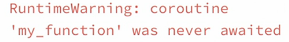

You cannot run this code as if it were regular code. You must explicitly hand over control to the event loop.

```python
import asyncio

async def my_function(argument):
    ... 
    await something()
    
asyncio.run(my_function())
```

There are other ways of handling execution to the event loop, but this is the most straightforward.

### Rule 2:  we can only await from an async function

```python
def my_func(argument):
    ...
    await something()

my_func()
```


### Rule 3:  awaiting something does not magically make it async

If you take a blocking API and add await to it, it won't turn into a non-blocking API.

## [Async sleep & gather](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/async-sleep-and-gather?autoSkip=true&autoplay=true&resume=false&u=76276956)

A toolbox you can use will allow you to:
- replace blocking with non-blocking code
- do multiple things at once with a utility called [asyncio.gather](https://docs.python.org/3/library/asyncio-task.html#asyncio.gather)
- running async code explicitly

Sync code can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_01_04_begin.py) and async can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_01_04_end.py).

```python
import asyncio
from datetime import datetime
import click


async def sleep_and_print(seconds):
    print(f"starting async {seconds} sleep 😴")
    await asyncio.sleep(seconds)
    print(f"finished async {seconds} sleep ⏰")
    return seconds


async def main():
    # using arguments
    results = await asyncio.gather(sleep_and_print(3), sleep_and_print(6))

    # building list
    # coroutines_list = []
    # for i in range(1, 11):
    #     coroutines_list.append(sleep_and_print(i))
    # results = await asyncio.gather(*coroutines_list)
    print(results)


start = datetime.now()
asyncio.run(main())
click.secho(f"{datetime.now()-start}", bold=True, bg="blue", fg="white")
```

By dsefining the async functions, it allows us to use **await** later.

The other difference is that instead of using `time.sleep()` (blocking) we use `asyncio.sleep()` which is non-blocking - along with **await**.

**asyncio.gather()** takes multiple coroutines and runs them concurrently when you await it.

Another way of doing this would be:

```python
import asyncio
from datetime import datetime
import click


async def sleep_and_print(seconds):
    print(f"starting async {seconds} sleep 😴")
    await asyncio.sleep(seconds)
    print(f"finished async {seconds} sleep ⏰")
    return seconds


async def main():
    # using arguments
    # results = await asyncio.gather(sleep_and_print(3), sleep_and_print(6))

    # building list
    coroutines_list = []
    for i in range(1, 11):
        coroutines_list.append(sleep_and_print(i))
    results = await asyncio.gather(*coroutines_list)
    print(results)


start = datetime.now()
asyncio.run(main())
click.secho(f"{datetime.now()-start}", bold=True, bg="blue", fg="white")
```

The coroutines will not run until **gather** is called - which accepts arguments (not a list). Which is why `coroutines_list` is pre-pended with an `*`.

It should take about as long as the longest piece.

### [Challenge 1](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/challenge-sleep-five?autoSkip=true&autoplay=true&resume=false&u=76276956)

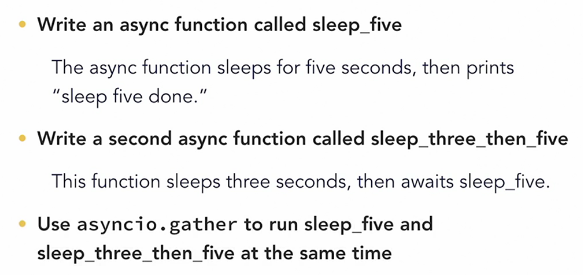

Code to get you started can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322).

The solution is explained [here](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/solution-sleep-five?autoSkip=true&autoplay=true&resume=false&u=76276956).

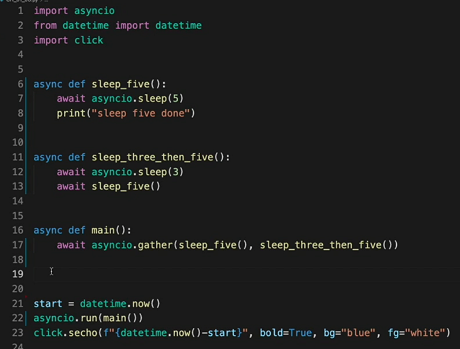

# Async Web Clients with aiohttp

## [Supercharging Requests ](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/supercharging-requests?autoSkip=true&autoplay=true&resume=false&u=76276956)

While common for python programs to make HTTP requests, but waiting for erach to complete could cause a hit to your application's performance. However, since they are I/O bound they can be greatly boosted with async programming.

A process for this might look like:

1. create a collection of coroutines (no HTTP call yet made)

2. wake up the coroutines with **gather**

3. requests fired simultaneously

Code for an initiatl example with blocking can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_02_01_begin.py).
- the [requests](https://docs.python-requests.org/en/latest/) library allows for synchronous HTTP calls
- httpbin allows you to test HTTP calls by echoing back what you sent it

Code with asyncio and [aiohttp](https://docs.aiohttp.org) (the go-to library for networking tasks with asynchronous python) is found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_02_01_end.py).
- line 25 opens a context **with** sesion.get() of a URL, wherein a session is passed into the function
- line 26 is similar to what **requests** does
- line 37 is where the coroutines are gatehred & run (gives a coroutine or coroutines)

## [Async WebSocket Client](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/async-websocket-client?autoSkip=true&autoplay=true&resume=false&u=76276956)

Modern real-time applications often require persistent connections to a server. These are allowed by web sockets. And when handling multiple persistent connections using WebSockets, asynchronous code can be of great assistance.

When it comes to web soket clients, it uses HTTP to offer a protocol upgrade to web sockets. The server can accept or reject - which a persistent connection is created only after acceptance. And this is where both client and server can listen and/or send messages. Examples of this include:
- real time analytics dashboards
- chat applications
- games

An example of a web socket client using asynchronous python can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_02_02_client.py).
- line 17 creates a non-blocking connection

I found with this code, that if using Python 3.10 there will be an issue:  `TypeError: As of 3.10, the *loop* parameter was removed from Lock() since it is no longer necessary`

... and only when you try to run client after server. Found through google search [this](https://github.com/aaugustin/websockets/issues/916) on [their GitHub](https://github.com/aaugustin/websockets). After checking the version by running `pip show websockets` found the installed requriements file uses the 9.1 version --- but the most recent is 10.2 version. So you'll need to update with:  `pip install websockets --upgrade`

Once websockets was upgraded, there was still a warning about `no current event loop` but it still worked.

While a fun example, often you will have APIs that offer a WebSocket endpoint. With this, you will be able to subscribe to multiple web socket endpoints at once in your python applciation.

## Challenge:  [Write Response to JSON](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/challenge-write-the-response-to-a-json-file)

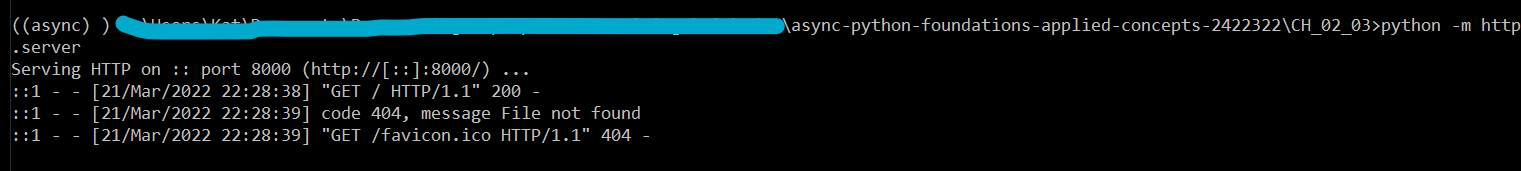

The code for your starting point can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/tree/main/CH_02_03).

Code for possible solution is [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/tree/main/CH_02_04).

To note about this challenge - the solution includes [loop](https://docs.python.org/3/library/asyncio-eventloop.html). This wasn't covered previously, so be sure to check this out.

Once you run it, you will see something like this:
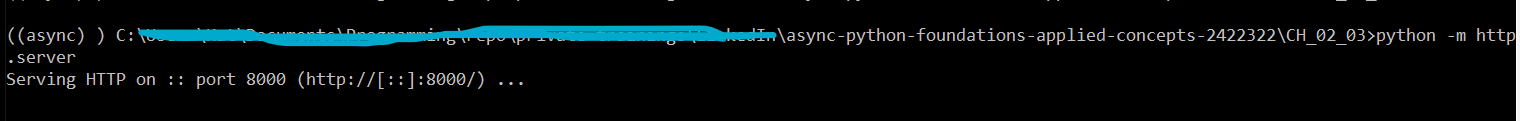

If you then go to a browser and type `localhost:PORTNUMBER` (with **PORTNUMBER** being the port on your screen), you will see something similar to the following in your command prompt if there is an issue:
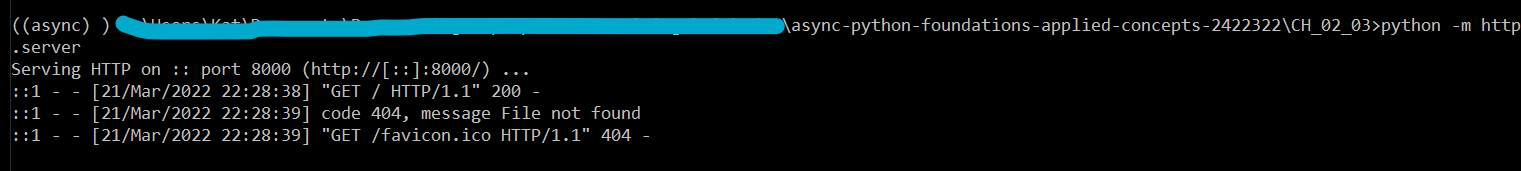

... otherwise, it should look like this:
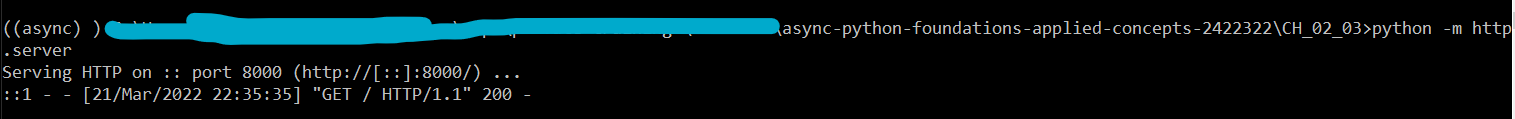

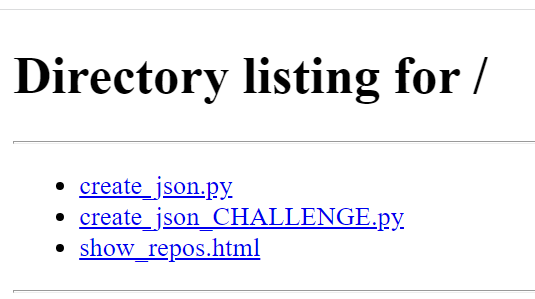

If it ran properly, clicking on **show_repos.html** should show something.

# Storage & Caching with aioredis

If you are on a Windows machine, just use the Gitpod provided.

## [How Redis Shines in Modern Applications](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/how-redis-shines-in-modern-applications)

Most modern web applications will need some sort of persistence layer. Can be optimized using asynchronous programming, since database access is I/O bound.

This particular program uses Redis, as it is:
- extremely versatile
- easy to get started (though it wasn't for me as a Windows user)
- can be accessed using aioredis (a library for interacting asynchronously with Python)
- ca be used as a cache, database, and even a queue

In a seperate terminal, you'll start **redis** by running:  `redis-server`

In a seperate terminal, run:  `redis-cli`

You should see something similar to this:

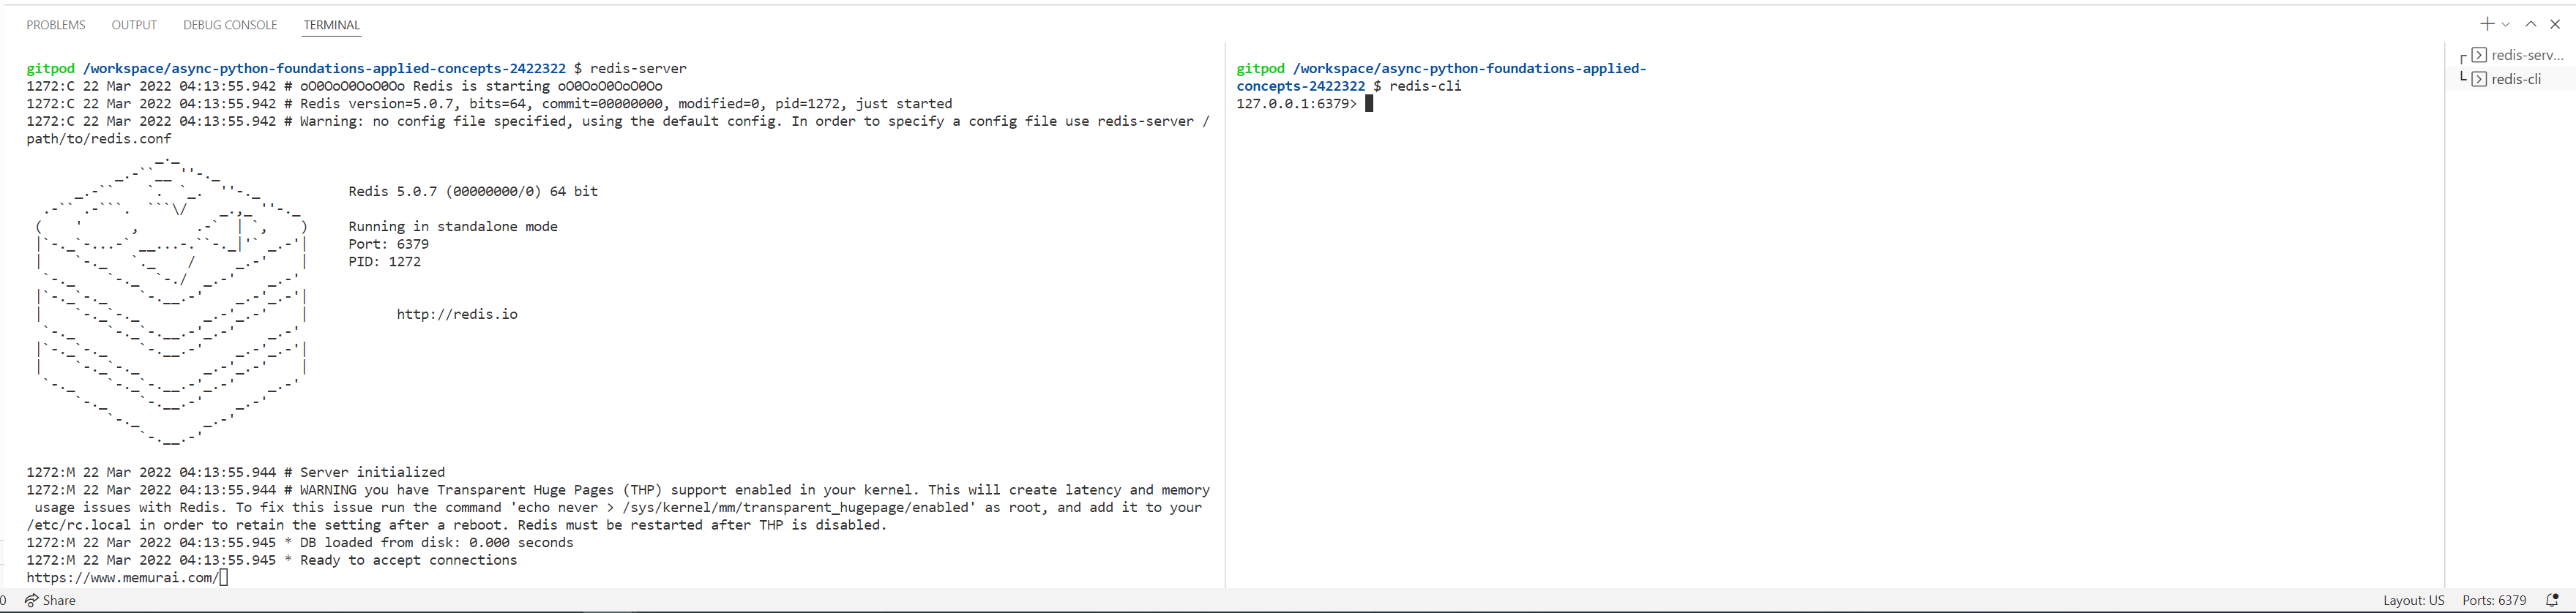

You can then run `clear` in the interactive CLI shell.

We will look at key-value pairs as well as lists.

Running `set name NAME` will allow for you to get the name:  `get name`

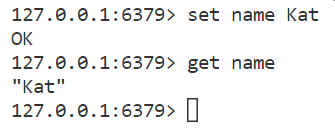

This seems simple, and is great to have a key-value cache that you can access across multiple processes in your application. It can be used for caching, storing user IPs, and more.

For a list, in redis you simply pretend the list already exists.
- `rpush` adds an item to the end
- `lpush` pre-pends items to a list
- to get the list, use `lrange LISTNAME startint endint`

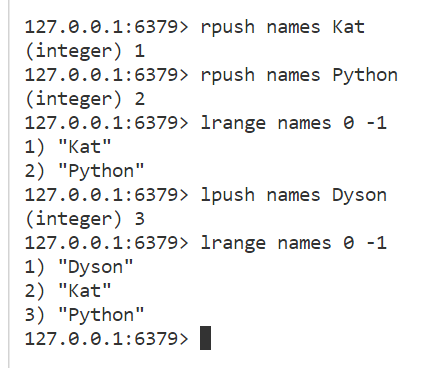

To delete everything in redis, run `FLUSHALL`

To exit the interactive CLI, hit `CTRL + D`

This is about all that's needed for a minimal chat app.

## [Getting Started with aioredis](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/getting-started-with-aioredis)

This section of the training refers to [this code](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_03_02.py). One of the imports is [aioredis](https://aioredis.readthedocs.io/en/latest/) - an API for interacting with Redis through asynchronous Python programming.

This code will create a classical chat. Aside from giving the chat a name, most of the functions are asynchronous methods that are waiting different redis functions.

## Challenge:  [Redis chat](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/challenge-redis-chat)

This challenge is to implement the get_name method for the chat API. Line 23 of this code returns nothing at the moment. The challenge is to return the name of the room created, but grab it from Redis - not the class attribute.

Original code for this challenge is found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_03_03.py). Solution code found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_03_04.py).

### Things To Take Note Of

1. You already know how to get the room name from a function that has already been created. The **encoding** part is not explained, however think of it as a variable to send as part of the `redis.get()` command. This encoding ensures you get a string instead of bytes.


2. Remember - you are using asynchronous programming! Don't forget to utilize `await` in your code.


3. Once you finish the function to get the name of your chat, you will have to call the function in `main()` and utilize the information in the `click.secho` string formatting.

# Modern Servers with ASGI

## What Is ASGI?

Most Python applications are written with the help of a framework like Django or Flask, then run with a Python web server like WSGI or Gunicorn.

These frameworks are compatible because of **WSGI** - the Web Server Gateway Interface. Like HTTP, it is a convention. For WSGI specifically, it:

- is how these servers & frameworks interact with one another
- allows for different frameworks to utilize different servers
- is very suitable for the conventional request & response cycle

Modern web development has newer protocols (e.g.:  web sockets) that have more than request & response. Persistent connections allowing for 2-way communication is common -- and where ASGI comes in.

- includes everything WSGI has
- allows asynchronous development in python programs utilizing modern protocols (_e.g.:  asynchronous HTTP, websockets, etc_)

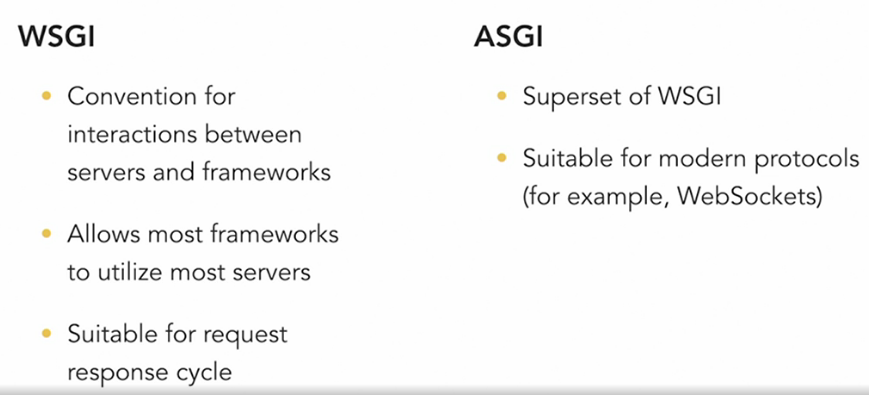

## [ASGI Landscape](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/asgi-landscape)

The ecosystem for this is growing. Here are a few that are popular.

### Web Frameworks

1. [Django](https://www.djangoproject.com/) (with [Channels](https://channels.readthedocs.io/en/stable/)) - Channels allow for robust, modern web applications with WebSocket asynchronous HTTP handling

2. [Quart](https://github.com/pgjones/quart) - a [Flask](https://flask.palletsprojects.com/en/2.0.x/) like framework compatible with a lot of Flask utilities, however it's asynchronous & allows for web sockets and asynchronous HTTP.  To note - **Flask** has started to support asynchronous programming. Yet **Quart** is still more robust.

3. [Sanic](https://sanic.dev/en/) - also a [Flask](https://flask.palletsprojects.com/en/2.0.x/) like framework BUT doesn't aim to be compatible with Flask utilities.

### Web Servers

1. [Daphne](https://github.com/django/daphne) - documentation found [here](https://docs.djangoproject.com/en/4.0/howto/deployment/asgi/daphne/). This is built on top of [twisted](https://twistedmatrix.com/trac/wiki) & works really well with Django Channels.

2. [Uvicorn](https://www.uvicorn.org/) - a wicked fast server 

## [Chat app using Quart](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/chat-app-using-quart)

To develop a simple chat app that has a persistent connection adn can allow real time discussion between browsers, you can view the code [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_04_03.py).

Things to note about this code:
- the instantiation of the app on line 7 is similar to what you may have seen in Flask
- line 10 allows for you to publish to each browser that connects to the application
- the `ws()` function:
    1. adds a websocket to the connetions pool
    2. through while loop, continually wait for the next message
    3. once you disconnect (the `finally` section) the connection is removed from the pool
    
    
- line 25 is the base route (which should be familiar to Flask developers) which returns a rendered template of the chat.html file (a front end for the application)

Downside of this application is if a new client comes in, there is no way for them to see existing messages.

## [Async Django & Django Channels At A Glance](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/async-django-and-django-channels-at-a-glance)

[Django Channels](https://channels.readthedocs.io/en/stable/) is a robusy API for implementing modern apps. It supports:
- WebSockets
- scalable publish-subscrib architecture

A great feature it supports is channel layers, which allow you to implement pubsub across robust apps using a message queue usually supported by Redis.

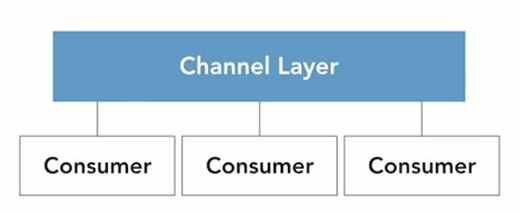

Be sure to review the docs for additional information on how to use.

## Challenge:  [Store Feed In Redis](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/challenge-store-feed-data-in-redis)

The prior chat app is missing some key features like:
- resetting a web page means you are unable to see the chat history
- new users cannot see the chat history

In this challenge, we will add the persistence layer.

Code to start with can be found [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_04_05.py) with the solution [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322/blob/main/CH_04_06.py).

The video solution walkthrough is [here](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/solution-store-feed-data-in-redis).

Even if you close the browser down or end your python code, when you start it back up the messages will still be there. That's because they are stored in Redis.

# Additional Resources
Here are some of the resources I utilized for creating thsi training.
1. LinkedIn Learning
    - [Async Python Foundations:  Applied Concepts](https://www.linkedin.com/learning/async-python-foundations-applied-concepts) - be sure to check out the GitHub repo [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322)!
    - [Faster Python Code](https://www.linkedin.com/learning/faster-python-code)
    - [Optimizing Python Services](https://www.linkedin.com/learning/faster-python-services)
    - [Python 3.10 First Look](https://www.linkedin.com/learning/python-3-10-first-look/)
2. From RealPython
    - [Speed Up Your Python Program With Concurrency](https://realpython.com/python-concurrency/) (an article) - be sure to check out [their GitHub repo](https://github.com/realpython/materials/tree/master/concurrency-overview)!
    - [Speed Up Python With Concurrency](https://realpython.com/courses/speed-python-concurrency/) (a video course)
    
To continue improving your code, the trainer suggested:
1. _Faster Python Code_ by Miki Tebeka
2. For web development (specifically Flask) check out _Flask Essential Training_ with Nick Walter
3. _Secure Coding in Python_ by Ronnie Sheer (same trainer as this one)